## OVERVIEW

Company Zen sells Apple and Google products and they seek to figure out how their products are doing in the market. Twitter is the main platform where the users rate and tweet their sentiments on their products. Zen seeks to find out the analysis of the feedbacks to know how the products are performing and to also inform on their relationship with Google and Apple.

## PROBLEM STATEMENT

Its important for a company to know how they products are being received in the market and what products have a positive or negative feedback from the users. This information is used to make informed decisions on their products and provide recommendations on what to do so as to remain competitive. Therefore this project seeks to analyse the tweets sentiments of Company zens Apple and Google products and also build an NLP model that can rate tweets sentiments and provide reccommendation for decision making.

## OBJECTIVES

1. Analyse the sentiments into positive, negatie and neutral
2. Identify the products that have positive and negative feedback
3. Develop an NLP model that can rate a tweet feedback to inform the ompany on performance

## DATA UNDERSTANDING

The data used in this project was sourced from data.world. It contains tweet reviews for brands and products and it will be used to develop our NLP model that can rate a sentiment of a tweet based on its content whether positive, negative or neutral.

In [53]:
#Import relevant libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nltk
import re
nltk.download('punkt')
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk import FreqDist
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from scipy.sparse.csr import csr_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [54]:
#load the data
df = pd.read_csv('data/judge-1377884607_tweet_product_company.csv', encoding='ISO-8859-1')
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [56]:
df.shape

(9093, 3)

In [57]:
df.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

In [58]:
df.rename(columns ={
    'tweet_text' : 'Text' ,
    'emotion_in_tweet_is_directed_at' : 'Product' ,
    'is_there_an_emotion_directed_at_a_brand_or_product' : 'Emotion'
}, inplace=True )

In [59]:
df.describe(include='all')

,Text,Product,Emotion
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


## DATA PREPARATION

This step involves examining the dataframe for any anomalies. It involves analysizing the data to identify any missing values, duplicated values etc

In [60]:
# chek for duplicates 

num_duplicates = df.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicates}")

# drop the duplicated rows

df = df.drop_duplicates()

Number of duplicated rows: 22


In [61]:
# check for missing values

df.isnull().sum()

Text          1
Product    5789
Emotion       0
dtype: int64

In [62]:
# drop missing values in 'Text' column
df = df.dropna(subset=['Text'])

# fill missing values in 'Product' column as tey are too many to drop

df['Product'].fillna('Unknown Product',inplace = True)

# check that the missing values have been handled

df.isnull().sum()

Text       0
Product    0
Emotion    0
dtype: int64

In [63]:
emotion_summary = df['Emotion'].value_counts()
emotion_perc = df['Emotion'].value_counts(normalize=True)
print(emotion_summary)
print('----------------------------------')
print('Percentages')
print(emotion_perc*100)

Emotion
No emotion toward brand or product    5375
Positive emotion                      2970
Negative emotion                       569
I can't tell                           156
Name: count, dtype: int64
----------------------------------
Percentages
Emotion
No emotion toward brand or product    59.261301
Positive emotion                      32.745314
Negative emotion                       6.273429
I can't tell                           1.719956
Name: proportion, dtype: float64


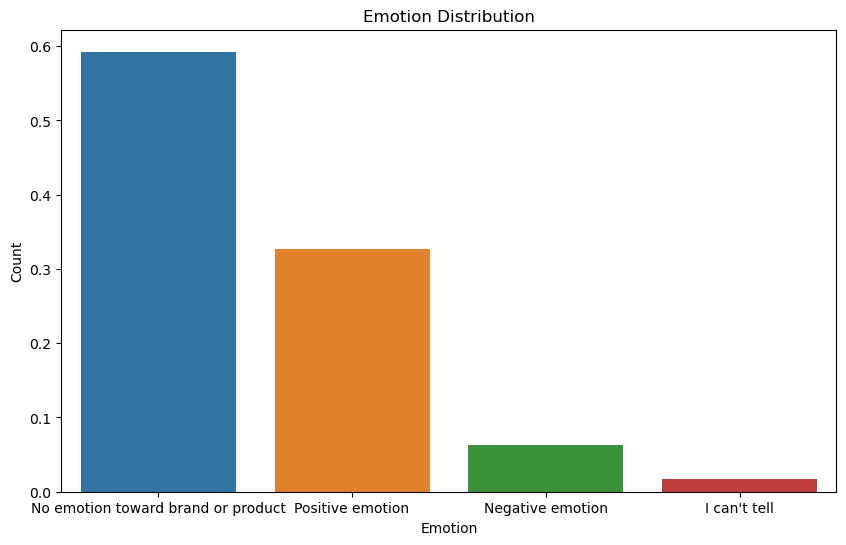

In [64]:
# create a bar plot

plt.figure(figsize=(10,6))
sns.barplot(x=emotion_perc.index, y=emotion_perc.values)

plt.title('Emotion Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')

plt.show()

Product
Unknown Product                    5788
iPad                                945
Apple                               659
iPad or iPhone App                  469
Google                              428
iPhone                              296
Other Google product or service     293
Android App                          80
Android                              77
Other Apple product or service       35
Name: count, dtype: int64


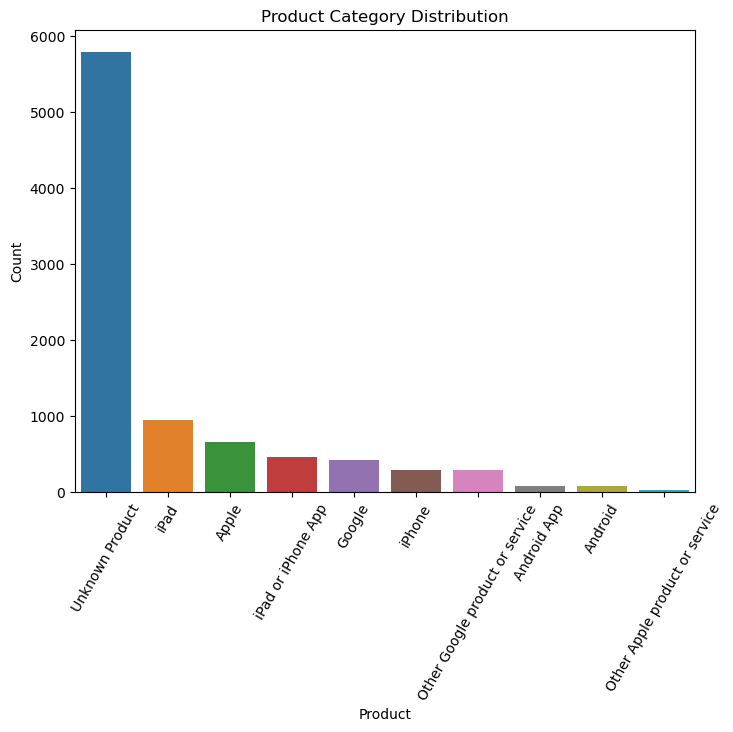

In [65]:
product_count = df['Product'].value_counts()
print(product_count)

# create a bar plot
plt.figure(figsize=(8,6))
sns.barplot(x=product_count.index, y=product_count.values)

plt.xlabel('Product')
plt.ylabel('Count')
plt.title('Product Category Distribution')
plt.xticks(rotation=60)

plt.show()